### Data Exploration and Cleaning

Importing related libraries and read the file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
notebook_path = r"/content/drive/MyDrive/SOCIAL_MEDIA"
os.chdir(notebook_path)
!pwd

df = pd.read_csv('Job_Tweets.csv')
df.head()

Mounted at /content/drive
/content/drive/MyDrive/SOCIAL_MEDIA


,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251


In [ ]:
# list all column names in the dataset
list(df.columns)

['ID',
 'Timestamp',
 'User',
 'Text',
 'Hashtag',
 'Retweets',
 'Likes',
 'Replies',
 'Source',
 'Location',
 'Verified_Account',
 'Followers',
 'Following']

In [ ]:
# to check dimensions of the dataset
print("Dimensions of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dimensions of the dataset:
Number of rows: 50000
Number of columns: 13


In [ ]:
# to get a summary of data types and non-null values
print("Summary of data types and non-null values:")
df.info()

Summary of data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


In [ ]:
# convert data type of user ID from int to object
df["ID"] = df["ID"].astype(object)
df.dtypes

,0
ID,object
Timestamp,object
User,object
Text,object
Hashtag,object
Retweets,int64
Likes,int64
Replies,int64
Source,object
Location,object


In [ ]:
# convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df[['Date']].head()

,Date
0,2019-12-30
1,2019-12-30
2,2019-12-30
3,2019-12-30
4,2019-12-30


In [ ]:
import re

# remove URL and HTML tags
df['Source'] = df['Source'].apply(lambda x: re.sub(r'http\S+', '', x))
df['Source'] = df['Source'].apply(lambda x: re.sub(r'<.*?>', '', x))
df[['Source']].head()

,Source
0,Instagram
1,Jobvite
2,Jobvite
3,ZipRecruiter Post Jobs
4,ZipRecruiter Post Jobs


In [ ]:
# describing categorical data
df.describe(include='object')

,ID,Timestamp,User,Text,Hashtag,Source,Location,Date
count,50000,50000,50000,50000,40684,50000,44011,50000
unique,50000,46795,13715,46507,14227,261,5973,150
top,1211798864656769025,2019-12-18 20:00:41+00:00,cameroncraig,We generally enjoy and are satisfied by being ...,"['hiring', 'jobs', 'Houston']",ZipRecruiter Post Jobs,United States,2021-12-14
freq,1,8,2513,134,792,21888,3504,781


In [ ]:
# describing numerical data
df.describe()

,Retweets,Likes,Replies,Followers,Following
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.692100,1.347860,0.108920,5.511382e+03,1961.965460
std,7.441484,17.527216,1.276483,6.770825e+04,5847.789338
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,8.000000e+01,94.000000
50%,0.000000,0.000000,0.000000,2.980000e+02,331.000000
75%,0.000000,0.000000,0.000000,1.258000e+03,1076.000000
max,1016.000000,1677.000000,175.000000,5.226473e+06,310791.000000


In [ ]:
# to check for any missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                     0
Timestamp              0
User                   0
Text                   0
Hashtag             9316
Retweets               0
Likes                  0
Replies                0
Source                 0
Location            5989
Verified_Account       0
Followers              0
Following              0
Date                   0
dtype: int64


In [ ]:
df["Hashtag"].fillna("[ ]", inplace = True)
df["Location"].fillna("No Location", inplace = True)

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                  0
Timestamp           0
User                0
Text                0
Hashtag             0
Retweets            0
Likes               0
Replies             0
Source              0
Location            0
Verified_Account    0
Followers           0
Following           0
Date                0
dtype: int64


<ipython-input-12-f7a0cd562d77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hashtag"].fillna("[ ]", inplace = True)
<ipython-input-12-f7a0cd562d77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# to count the number of duplicated rows
duplicate_rows = df.duplicated()
num_duplicates = sum(duplicate_rows)
print(num_duplicates)

0


In [ ]:
df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Date
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,[ ],0,1,0,Instagram,"20 miles SE of Taos, NM",False,3342,258,2019-12-30
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,Jobvite,Arizona,False,63,129,2019-12-30
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,Jobvite,"Texas, USA",False,19,50,2019-12-30
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,ZipRecruiter Post Jobs,"Orange County, California",False,966,1569,2019-12-30
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,ZipRecruiter Post Jobs,United States,False,983,1251,2019-12-30


<br>

### Explanatory Data Analysis

In [ ]:
# to display unique values in the columns given to identify categorical variables
columns = ["Hashtag", "Date", "Location", "Source", "Verified_Account"]
for column in columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Hashtag:
['[ ]' "['job']"
 "['becomearacker', 'Rackspace', 'recruiting', 'talentacquisition', 'jobsearching', 'job']"
 ... "['projectcoordinator', 'london', 'jobs']"
 "['SSADigital', 'Recruitment', 'Hiring', 'Review']"
 "['hiring', 'nqsf', 'recruitment', 'vocationaltraining', 'jobalert', 'job']"]

Unique values in Date:
[datetime.date(2019, 12, 30) datetime.date(2019, 12, 29)
 datetime.date(2019, 12, 28) datetime.date(2019, 12, 27)
 datetime.date(2019, 12, 26) datetime.date(2019, 12, 25)
 datetime.date(2019, 12, 24) datetime.date(2019, 12, 23)
 datetime.date(2019, 12, 22) datetime.date(2019, 12, 21)
 datetime.date(2019, 12, 20) datetime.date(2019, 12, 19)
 datetime.date(2019, 12, 18) datetime.date(2019, 12, 17)
 datetime.date(2019, 12, 16) datetime.date(2019, 12, 15)
 datetime.date(2019, 12, 14) datetime.date(2019, 12, 13)
 datetime.date(2019, 12, 12) datetime.date(2019, 12, 11)
 datetime.date(2019, 12, 10) datetime.date(2019, 12, 9)
 datetime.date(2020, 12, 30) dateti

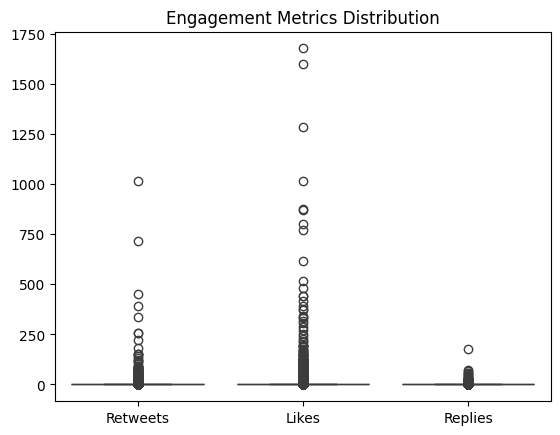

In [ ]:
# Plot distributions
sns.boxplot(data=df[['Retweets', 'Likes', 'Replies']])
plt.title('Engagement Metrics Distribution')
plt.show()

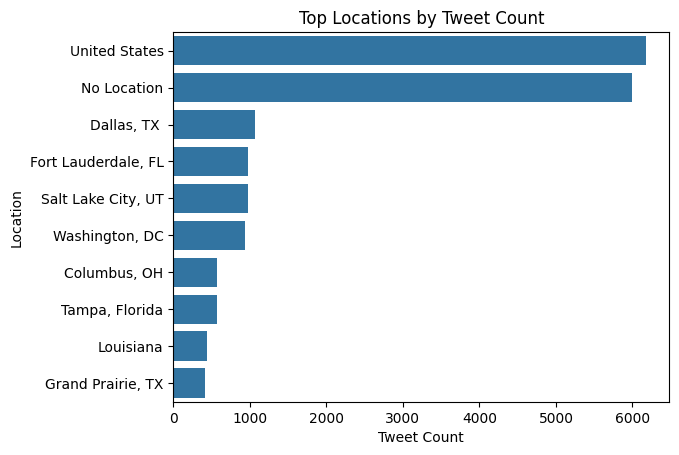

In [ ]:
# Dictionary to map variations of location names to a unified name
location_mapping = {
    'USA' : 'United States',
    'Washington. DC' : 'Washington, DC',
    'UK' : 'United Kingdom',
    'Arizona, USA' : 'Arizona'
    # Add more variations as needed
}

# Ensure that the 'Location' column is treated as strings, replacing NaN with 'Unknown'
df['Location'] = df['Location'].fillna('Unknown').astype(str)

# Apply the dictionary to standardize the locations in the 'Location' column
df['Location'] = df['Location'].replace(location_mapping)

# Count the top 10 locations by tweet count
location_counts = df['Location'].value_counts().head(10)

# Plot bar chart
sns.barplot(x=location_counts.values, y=location_counts.index)
plt.title('Top Locations by Tweet Count')
plt.xlabel('Tweet Count')
plt.ylabel('Location')
plt.show()

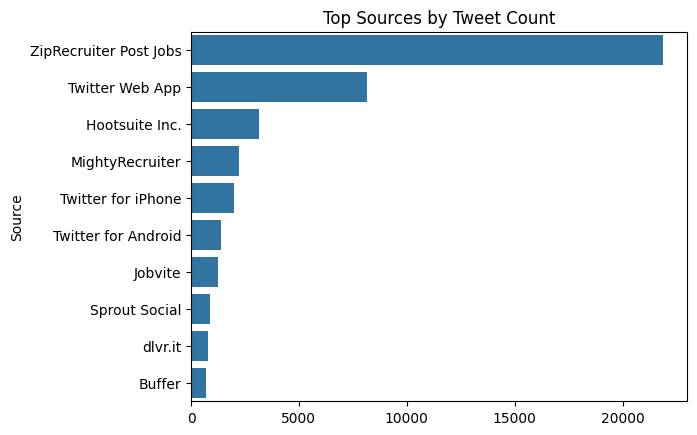

In [ ]:
# Count tweets by source
source_counts = df['Source'].value_counts().head(10)

# Bar chart
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title('Top Sources by Tweet Count')
plt.show()

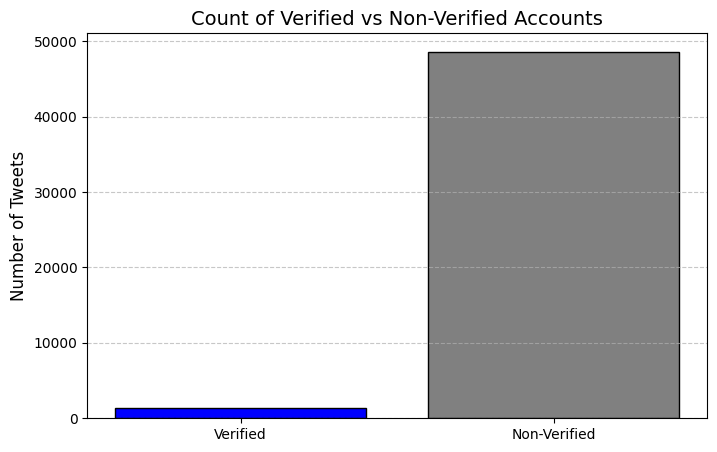

Difference in counts (Verified - Non-Verified): 47248


In [ ]:
# Count the number of tweets for verified and non-verified accounts
verified_counts = df['Verified_Account'].value_counts()

# Calculate the difference in counts
difference = verified_counts[True] - verified_counts[False]

# Prepare data for plotting
labels = ['Verified', 'Non-Verified']
values = [verified_counts[True], verified_counts[False]]

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'gray'], edgecolor='black')
plt.title('Count of Verified vs Non-Verified Accounts', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display the difference
print(f"Difference in counts (Verified - Non-Verified): {abs(difference)}")

<ipython-input-20-de1ddaa254e2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_counts.head(10).index, y=hashtag_counts.head(10).values, palette="viridis")


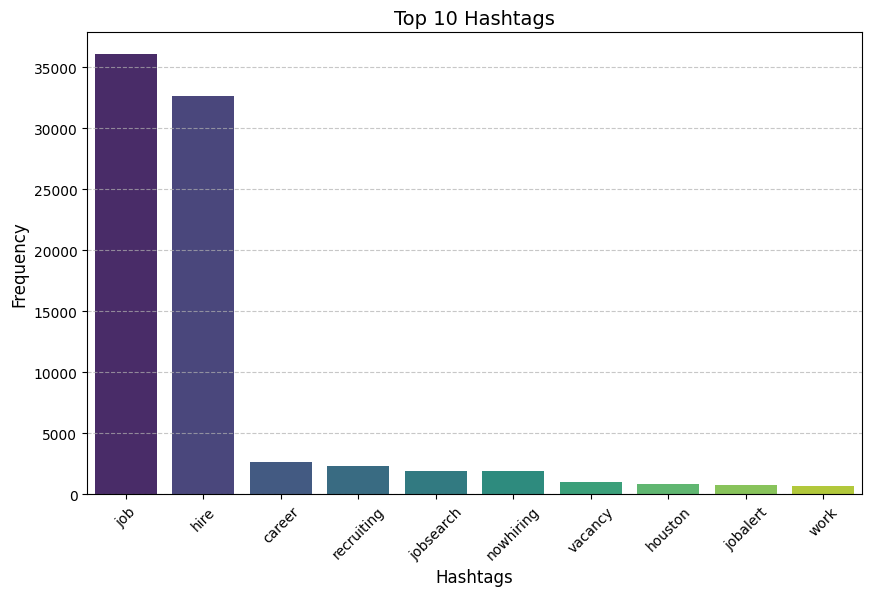

In [ ]:
# Extract hashtags from the 'Hashtag' column
df['Hashtag'] = df['Hashtag'].fillna('[]')  # Replace NaN with empty list
hashtags = df['Hashtag'].apply(eval).explode()  # Convert string lists to actual lists and flatten

# Normalize hashtags: Convert to lowercase
hashtags = hashtags.str.lower()

# Manual mapping of similar words (plural -> singular)
synonym_mapping = {
    'job': ['job', 'jobs'],
    'career': ['career', 'careers'],
    'recruiting': ['recruitment'],
    'hire': ['hire', 'hiring'],
    'nowhiring' : ['hiringnow']
}

# Function to replace hashtags with the common form
def map_to_common_hashtag(hashtag):
    for common, variations in synonym_mapping.items():
        if hashtag in variations:
            return common
    return hashtag  # Return the original if no match is found

# Apply the function to map hashtags
hashtags = hashtags.apply(map_to_common_hashtag)

# Count occurrences of each normalized hashtag
hashtag_counts = hashtags.value_counts()

# Plot top 10 hashtags
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_counts.head(10).index, y=hashtag_counts.head(10).values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Top 10 Hashtags', fontsize=14)
plt.xlabel('Hashtags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Filter the data to include only verified accounts
verified_data = df[df['Verified_Account'] == True]

# Sort the data by 'Followers' in descending order
verified_data = verified_data.sort_values(by='Followers', ascending=False)

# Remove duplicate entries for the same 'User'
verified_data = verified_data.drop_duplicates(subset='User', keep='first')

# Select relevant columns: 'User', 'Following', and 'Followers'
verified_table = verified_data[['User', 'Following', 'Followers']]

# Display the first few rows (top most-followed verified accounts)
verified_table.head()

,User,Following,Followers
8793,nikestore,137,5226473
32736,news7tamil,470,2224877
8833,ntvuganda,499,1991358
16796,SpinninRecords,702,1727773
15586,CityofJoburgZA,60497,1164120


In [ ]:
# Group by 'Source' and 'Location' and count occurrences
source_location_counts = df.groupby(['Source', 'Location']).size().reset_index(name='Count')

# Sort by 'Count' in descending order
source_location_counts_sorted = source_location_counts.sort_values(by='Count', ascending=False)

# Display the table
source_location_counts_sorted[['Source', 'Location', 'Count']].head(10)

,Source,Location,Count
8661,ZipRecruiter Post Jobs,United States,5169
8556,ZipRecruiter Post Jobs,No Location,1481
8413,ZipRecruiter Post Jobs,"Dallas, TX",1073
8441,ZipRecruiter Post Jobs,"Fort Lauderdale, FL",975
8608,ZipRecruiter Post Jobs,"Salt Lake City, UT",968
5529,Twitter Web App,No Location,860
8819,dlvr.it,United States,633
8649,ZipRecruiter Post Jobs,"Tampa, Florida",563
6369,Twitter Web App,"Washington, DC",548
2724,MightyRecruiter,No Location,543
